# Wizualizacja danych

http://smarterpoland.pl/index.php/2019/12/najgorszy-wykres-2019/

http://smarterpoland.pl/index.php/2020/12/plebiscyt-na-najgorszy-wykres-roku-2020/

http://smarterpoland.pl/index.php/2021/12/plebiscyt-na-najgorszy-wykres-roku-2021/

http://www.biecek.pl/Eseje/

*Factfulness: Ten Reasons We're Wrong About the World – and Why Things Are Better Than You Think*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats

*Wykres* będzie dla nas reprezentacją *danych*. Wykres składa się z *elementów*, takich jak słupki, koła, ikony. 

Dane składają się ze *zmiennych* (cena, waga, temperatura, prędkość) które opisane są w *skalach*. 

Wizualizacja danych polega na *przedstawieniu/zakodowaniu* danych za pomocą *cech* elementów wykresów.'



# Skale pomiarowe

* **skala ilorazowa** (ang.*ratio scale*) - skala, w której istnieje fizyczny sens zarówno dla różnic i ilorazów, np. cena produktu (kilogram jabłek może być o 2 zł tańszy od kilograma gruszek, kilogram ogórków jest dwa razy tańszy od kilograma pomidorów);

* **skala przedziałowa** (ang. *interval scale*) - skala, w której istnieje fizyczny sens różnic wartości, ale nie ich ilorazów, np. daty, temperatura (I Wojna Światową rozpoczęła się 25 lat przed II Wojną Światową);

* **skala porządkowa** (ang. *ordinal scale*) - skala, dla której istnieje fizyczny sens dla kolejności wartości, ale nie dla ich różnic czy ilorazów, np. wykształcenie;

* **skala nominalna** (ang. *nominal scale*) - skala, w której wartości można zapisać za pomocą liczb, ale nie ma fizycznej interpretacji dla kolejności tych wartości, różnic czy ilorazów, np. numer PESEL;

# Typy wykresów

### Wykres punktowy (ang. *scatter plot*)
$X$ - zmienna numeryczna, $Y$ - zmienna numeryczna.

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

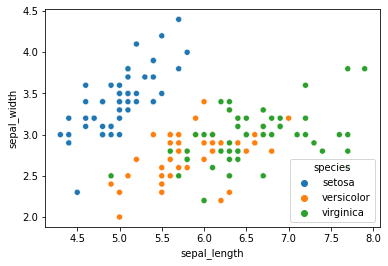

In [6]:
sns.scatterplot(x="sepal_length", y="sepal_width", data=df, hue="species")

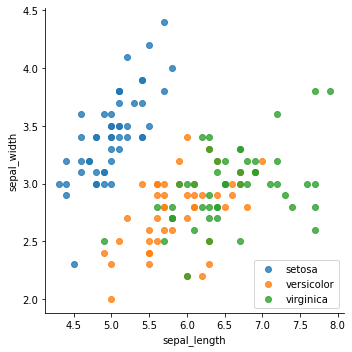

In [5]:
sns.lmplot(x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False)
plt.legend(loc='lower right')  # ręczne ustawienie położenia legendy, bo lmplot() tego nie umożliwia

### Wykres słupkowy (ang. *bar plot*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna numeryczna.

In [7]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
?sns.barplot

In [10]:
print(np.mean(titanic.survived[titanic.sex.values == 'male']))
print(np.mean(titanic.survived[titanic.sex.values == 'female']))

0.18890814558058924
0.7420382165605095


<AxesSubplot:xlabel='sex', ylabel='survived'>

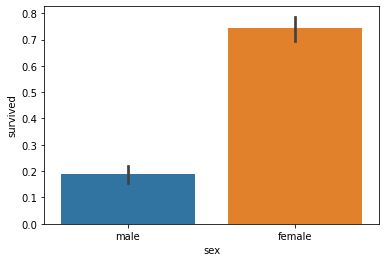

In [17]:
# sns.barplot(x="sex", y="survived", data=titanic, estimator=sum)
sns.barplot(x="sex", y="survived", data=titanic)  # odchylenia standardowe z rozkładu Bernoulliego (?)

<AxesSubplot:xlabel='sex', ylabel='survived'>

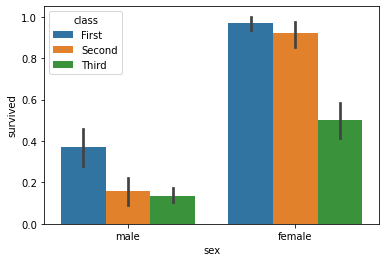

In [15]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

### Skumulowany wykres słupkowy (ang. *stacked bar plot*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna numeryczna.

In [18]:
grouped_titanic = titanic.groupby(['class', 'sex'])['survived'].agg('sum')
grouped_titanic

class   sex   
First   female    91
        male      45
Second  female    70
        male      17
Third   female    72
        male      47
Name: survived, dtype: int64

In [19]:
sex = np.unique(titanic['sex'])

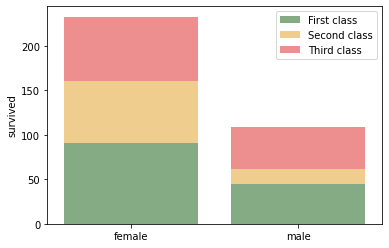

In [23]:
sns.barplot(x=sex, y=grouped_titanic['First'], label="First class", color="darkgreen", alpha=0.5)

sns.barplot(x=sex, y=grouped_titanic['Second'], bottom = grouped_titanic['First'],
            label='Second class', color="orange", alpha=0.5)

sns.barplot(x=sex, y=grouped_titanic['Third'], bottom = grouped_titanic['First'] + grouped_titanic['Second'], 
            label='Third class', color="red", alpha=0.5)

plt.legend()
plt.show()

### Histogram (ang. *histogram*) 
$X$ - zmienna numeryczna, $Y$ - zmienna numeryczna.

In [24]:
?sns.distplot

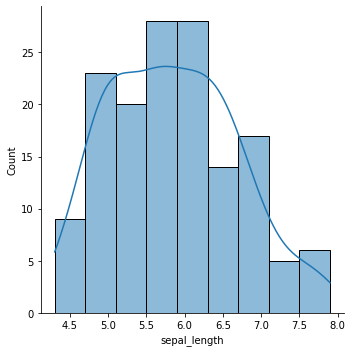

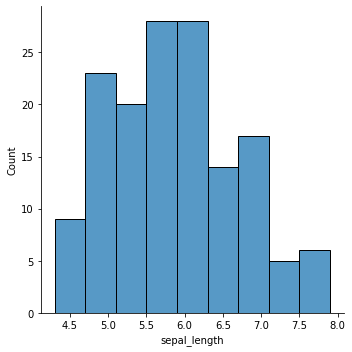

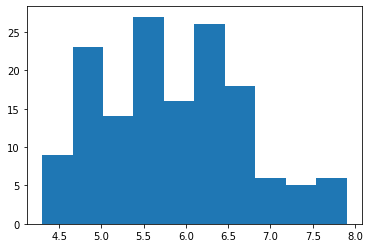

In [47]:
df = sns.load_dataset('iris')
  
#sns.displot(df["sepal_length"], kind="kde")  # 'kernel density estimator' (jądrowy estymator gęstości)
sns.displot(df["sepal_length"], kind="hist", kde=True) # nowa wersja funkcji
plt.show()

# sns.distplot(df["sepal_length"], kde=False) # stara wersja funkcji, wkrótce będzie wycofana
sns.displot(df["sepal_length"], kde=False) # stara wersja funkcji, wkrótce będzie wycofana
plt.show()

plt.hist(df["sepal_length"], bins=10)
plt.show()

In [37]:
print(f'{np.sqrt(df["sepal_length"].size)*3/4}, {np.sqrt(df["sepal_length"].size)}') 

9.185586535436919, 12.24744871391589


<Figure size 864x576 with 0 Axes>

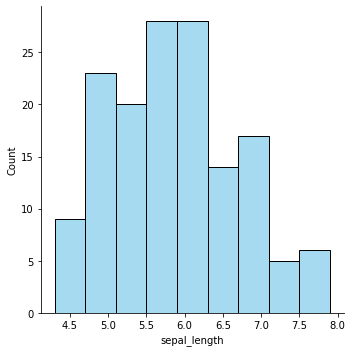

<Figure size 864x576 with 0 Axes>

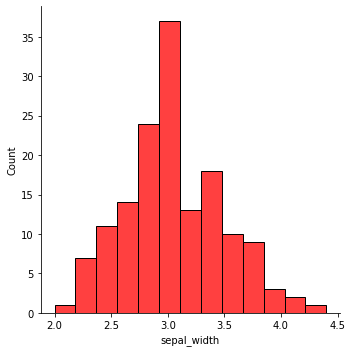

In [45]:
plt.figure(figsize=(12, 8))
sns.displot(df["sepal_length"], color="skyblue", label="Sepal Length")
plt.show()

plt.figure(figsize=(12, 8))
sns.displot(df["sepal_width"], color="red", label="Sepal Width")
plt.show()

### Estymator jądrowy gęstości (ang. *kernel density plot*) 
$X$ - zmienna numeryczna, $Y$ - zmienna numeryczna

In [41]:
?sns.kdeplot

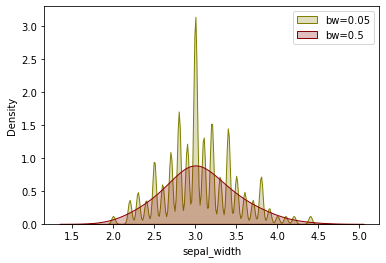

In [44]:
df = sns.load_dataset('iris')
 
# bw - parametr wygładzania
sns.kdeplot(df['sepal_width'], fill=True, bw_method=.05, color="olive")
sns.kdeplot(df['sepal_width'], fill=True, bw_method=.5, color="darkred")
plt.legend(["bw=0.05", "bw=0.5"])
plt.show()

### Pair plot 
$X$ - zmienna numeryczna, $Y$ - zmienna numeryczna.

<Figure size 1296x720 with 0 Axes>

<Figure size 800x640 with 0 Axes>

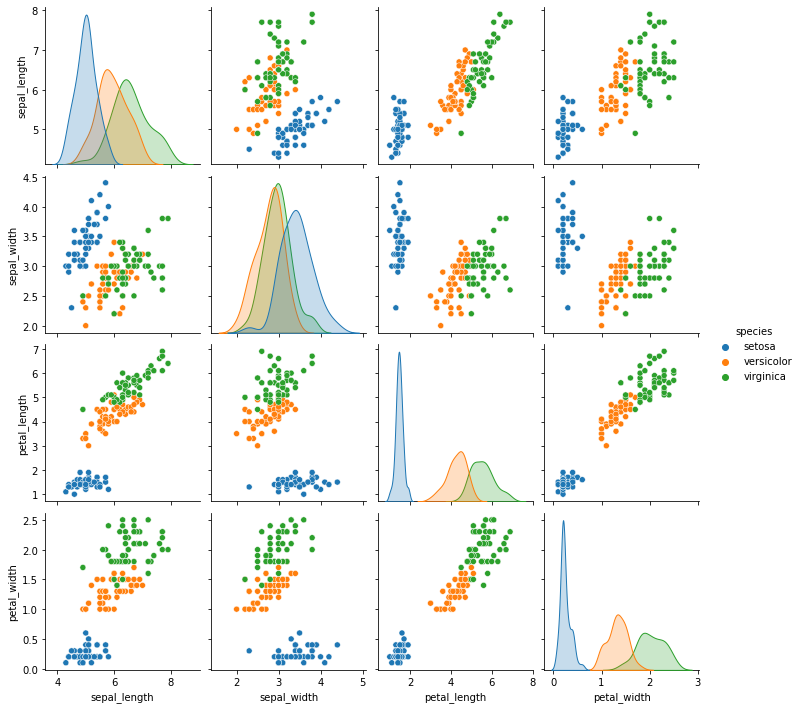

In [50]:
plt.figure(figsize=(18, 10))
df = sns.load_dataset('iris')

plt.figure(figsize=(10,8), dpi=80)
sns.pairplot(df, kind="scatter", hue="species")
plt.show()

### Wykres pudełkowy (ang. *boxplot*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna numeryczna.

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

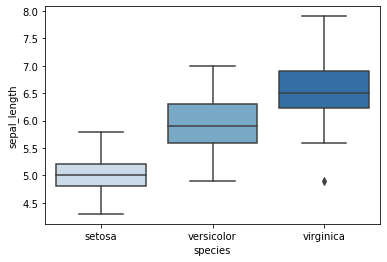

In [51]:
df = sns.load_dataset('iris')

sns.boxplot(x=df["species"], y=df["sepal_length"], palette="Blues")

In [53]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Text(0, 0.5, 'tip')

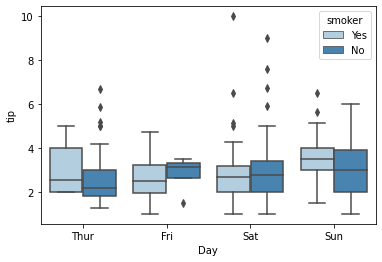

In [55]:
# Grouped boxplot
sns.boxplot(x="day", y="tip", hue="smoker", data=df, palette="Blues", width=0.8)
plt.xlabel("Day")
plt.ylabel("tip")

### Wykres skrzypcowy (ang. *violin plot*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna numeryczna.

<AxesSubplot:xlabel='sepal_length', ylabel='species'>

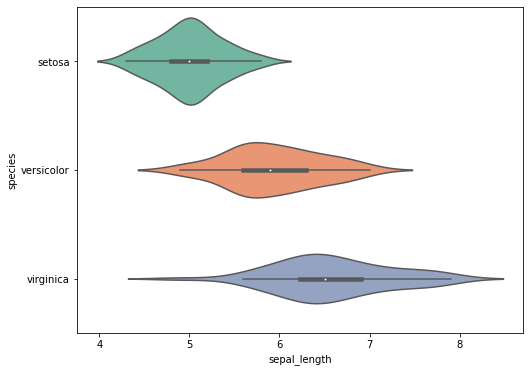

In [61]:
df = sns.load_dataset('iris')

plt.figure(figsize=(8, 6))
sns.violinplot(y=df["species"], x=df["sepal_length"], palette="Set2")

### Mapa termiczna (ang. *heat map*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna kateoryczna, $Z$ - zmienna numeryczna.

In [67]:
df = pd.read_csv("../data/mtcars.csv")
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

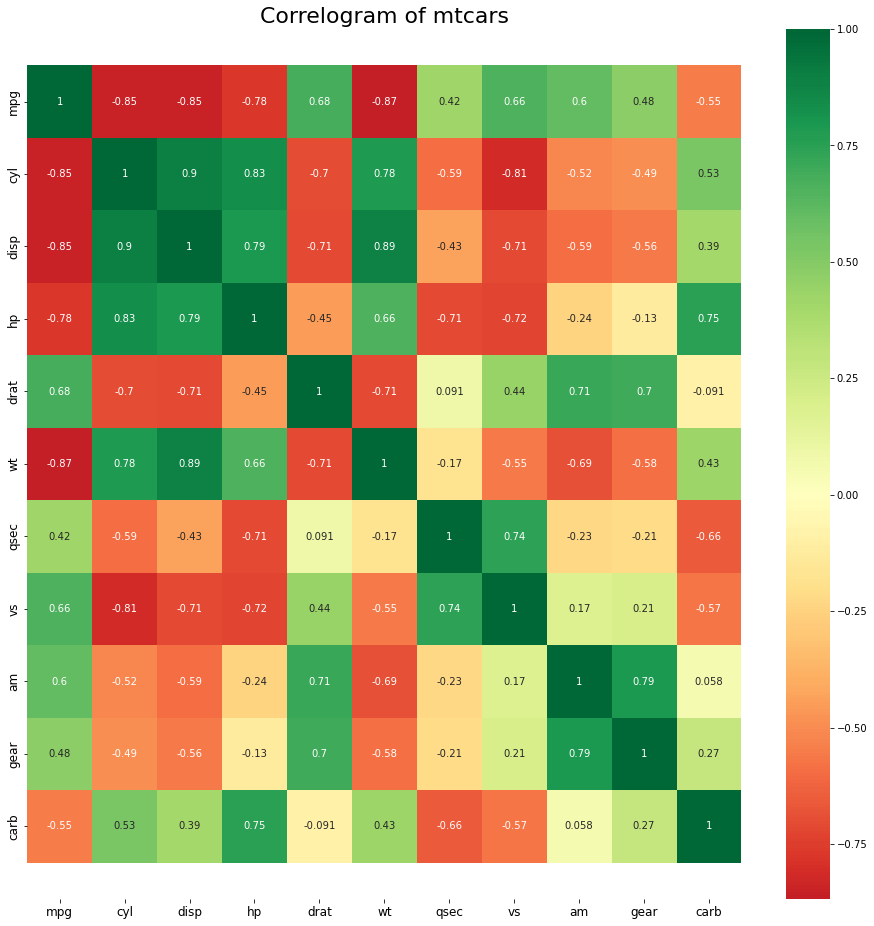

In [65]:
# Plot (Pearson's correlation)
plt.figure(figsize=(16, 16))

ax = sns.heatmap(df.corr(), 
                 xticklabels=df.corr().columns, 
                 yticklabels=df.corr().columns, 
                 cmap='RdYlGn', 
                 center=0, 
                 annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

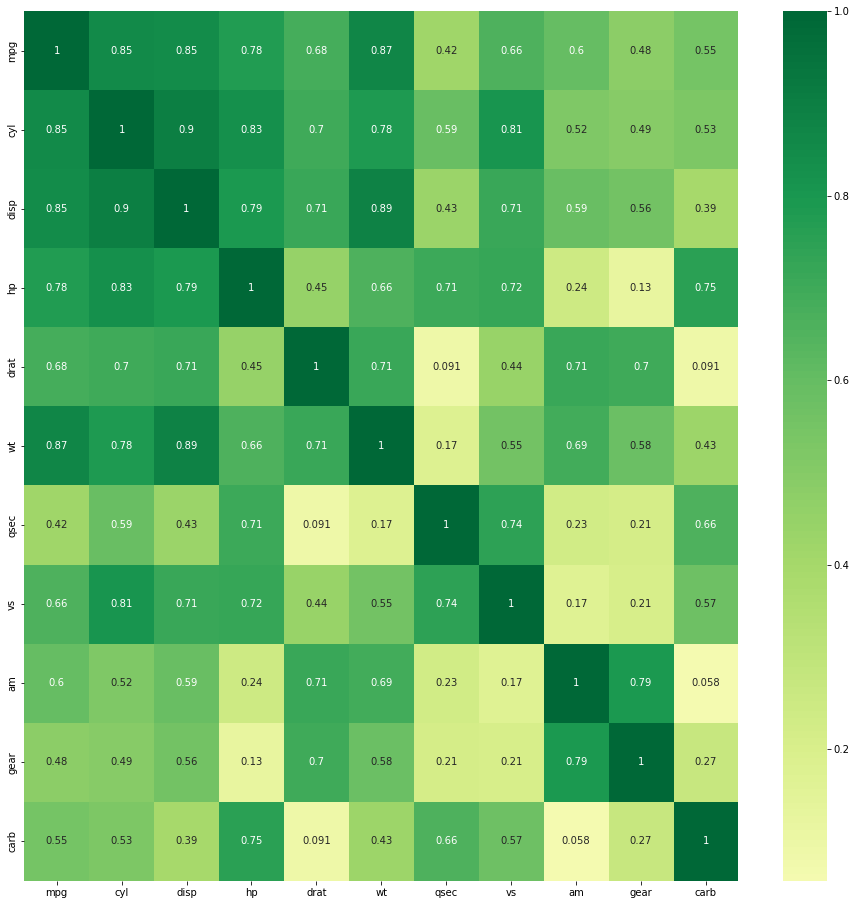

In [66]:
# Plot (absolute value of Pearson's correlation)
plt.figure(figsize=(16, 16))

ax = sns.heatmap(np.abs(df.corr()), 
                 xticklabels=df.corr().columns, 
                 yticklabels=df.corr().columns, 
                 cmap='RdYlGn', 
                 center=0, 
                 annot=True)

# Zadanie - `nycflights13`

Zbiór danych `nycflights13` (https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf) zawiera dane dotyczące wszystkich lotów rozpoczynających się w Nowym Jorku w 2013 r. 

Obejmuje metadane dotyczące linii lotniczych, lotnisk, pogody i samolotów.

In [70]:
nycflights13 = pd.read_csv("../data/nycflights13.csv")
nycflights13.shape

(336776, 30)

Narysuj wykresy prezentujące:

In [77]:
# 1. dzienną liczbę lotów
    
import datetime

nycflights13['date'] = nycflights13.apply(lambda row: datetime.datetime(row.year, row.month, row.day), axis=1)
nycflights13.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour.y,date
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01 05:00:00,2013-01-01
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0,2013-01-01 05:00:00,2013-01-01
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00,2013-01-01
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00,2013-01-01
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0,2013-01-01 06:00:00,2013-01-01


In [82]:
flights_per_day = nycflights13.groupby('date')['year'].count()
flights_per_day

date
2013-01-01    842
2013-01-02    943
2013-01-03    914
2013-01-04    915
2013-01-05    720
             ... 
2013-12-27    963
2013-12-28    814
2013-12-29    888
2013-12-30    968
2013-12-31    776
Name: year, Length: 365, dtype: int64

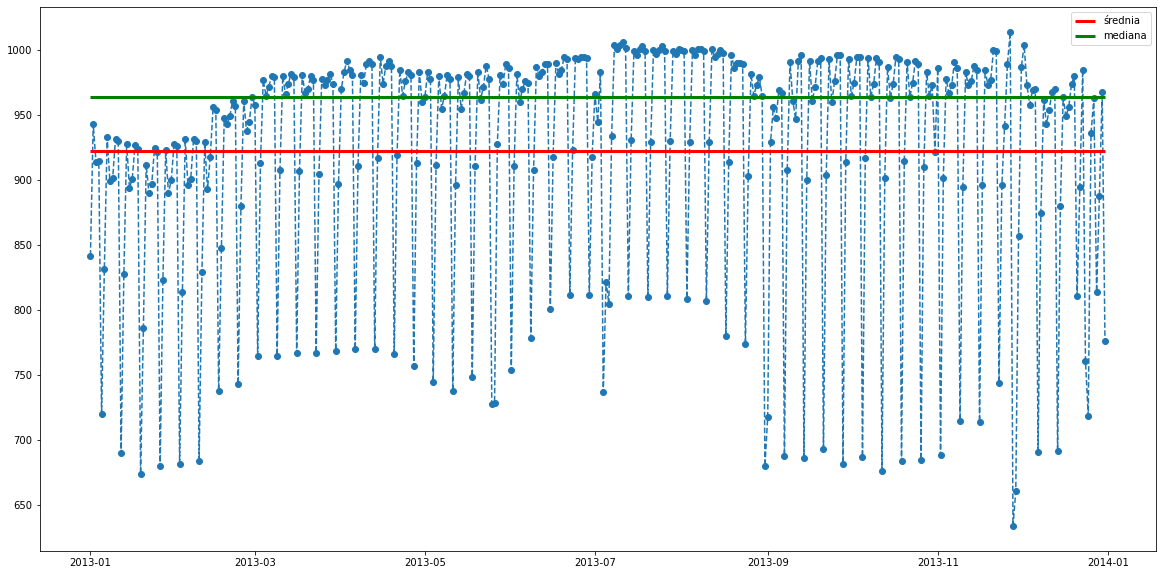

In [84]:
plt.figure(figsize = (20,10))

plt.plot(flights_per_day,'o--')

plt.hlines(xmin=flights_per_day.index.min(), xmax=flights_per_day.index.max(), y=np.mean(flights_per_day),
           color='red', label='średnia', lw=3)

plt.hlines(xmin=flights_per_day.index.min(), xmax=flights_per_day.index.max(), y=np.median(flights_per_day),
           color='green', label='mediana', lw=3)

plt.legend()
plt.show()

In [85]:
# 2. udział zrealizowanych lotów w każdym miesiącu

import calendar

flights_per_month = nycflights13.groupby('month')['year'].count()
flights_per_month.head()

month
1    27004
2    24951
3    28834
4    28330
5    28796
Name: year, dtype: int64

[]

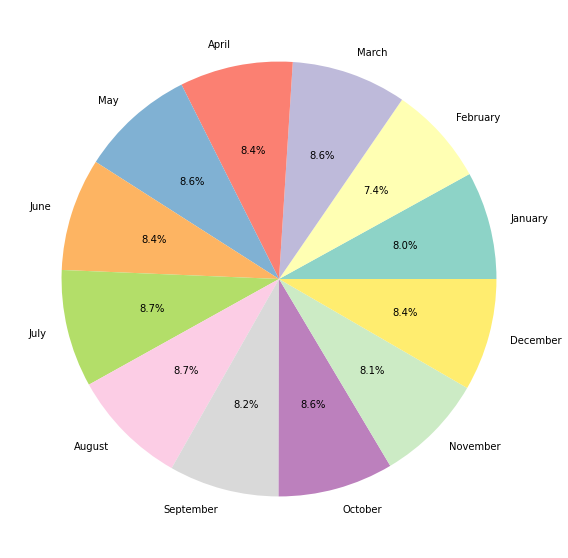

In [87]:
plt.figure(figsize = (20,10))

cs = cm.Set3(np.arange(len(flights_per_month) + 1))
plt.pie(flights_per_month, labels=[calendar.month_name[i] for i in flights_per_month.index],
        colors = cs, autopct = '%1.1f%%')

plt.plot()

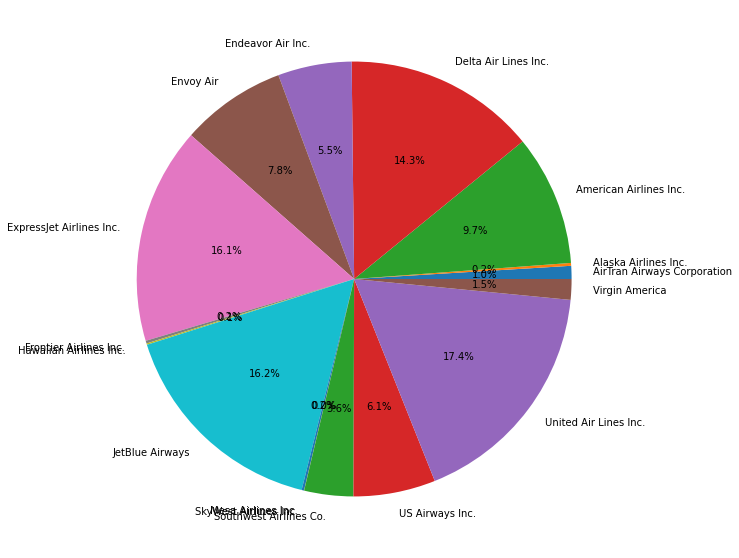

In [88]:
# 3. udział linii lotnicznych w zrealizowanych lotach
    
flights_by_carier_name = nycflights13.groupby('carrier_name')['year'].count().reset_index()

plt.figure(figsize=(20,10))
plt.pie(flights_by_carier_name['year'], labels=flights_by_carier_name['carrier_name'], autopct ='%1.1f%%')
plt.show()

In [95]:
OTHER_GROUP_THRESHOLD = 0.05

all_flights = sum(flights_by_carier_name['year'])

flights_by_carier_name['carrier_group_name'] = flights_by_carier_name.apply(lambda row: row['carrier_name'] 
                         if row['year'] / all_flights >= OTHER_GROUP_THRESHOLD else 'Other', axis=1)

flights_by_carier_name_group = flights_by_carier_name.groupby('carrier_group_name')['year'].sum()

[]

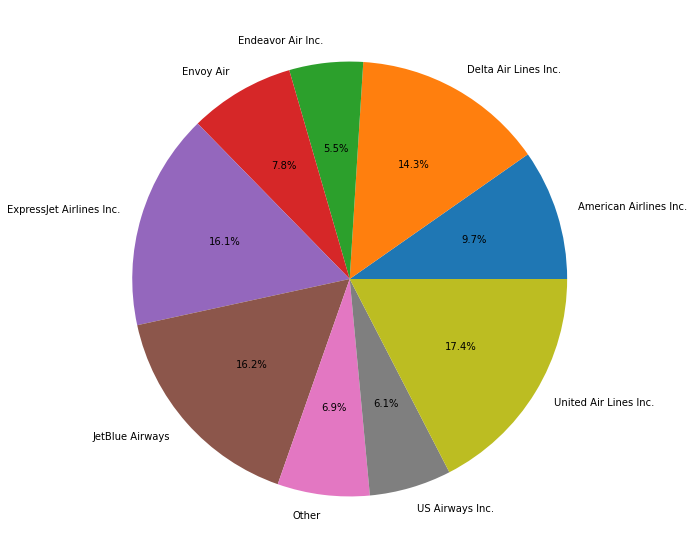

In [96]:
plt.figure(figsize=(20, 10))

plt.pie(flights_by_carier_name_group, labels=flights_by_carier_name_group.index, 
       autopct='%1.1f%%')
plt.plot()

In [97]:
# 4. udział lotów, które wystartowały po czasie, wystartowały przed czasem, wystartowały na czas w każdym miesiącu.
    
THRESHOLD = 15  # loty o czasie w przedziale 15 minutowym (terminologia branży lotniczej)

grouped = nycflights13.groupby('month')['dep_delay']

dep_delay_count_per_month = pd.DataFrame()

dep_delay_count_per_month['on_time'] = grouped.agg(lambda x: sum(np.isnan(x) | ((x >= -THRESHOLD) & (x <= THRESHOLD))))
dep_delay_count_per_month['delay'] = grouped.agg(lambda x: sum(x > THRESHOLD))
dep_delay_count_per_month['ahead'] = grouped.agg(lambda x: sum(x < -THRESHOLD))

dep_delay_count_per_month['N'] = dep_delay_count_per_month.apply(lambda row: sum(row), axis=1)

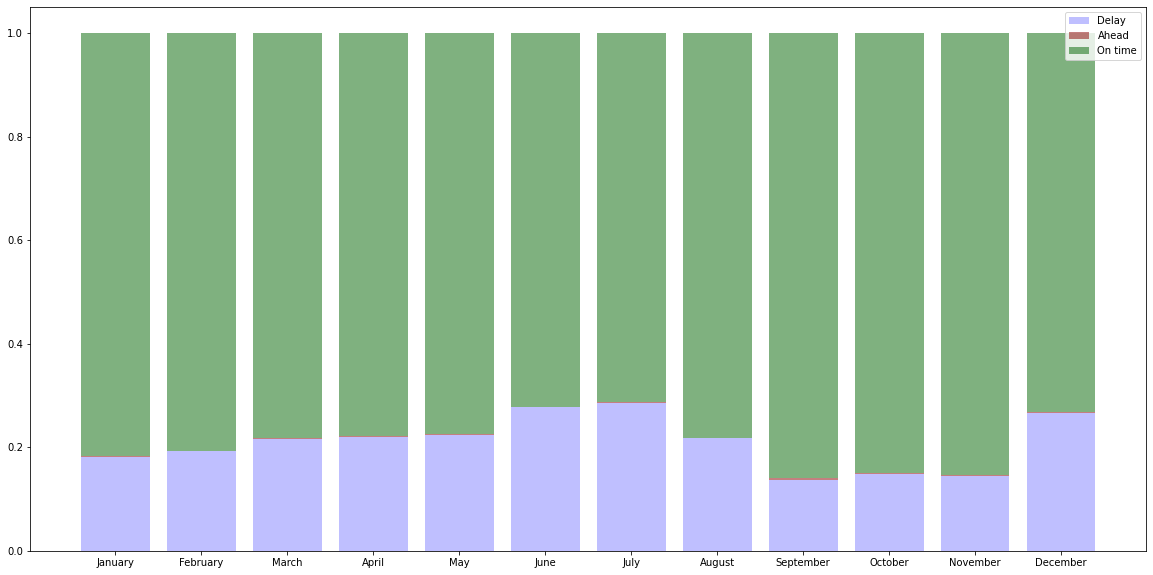

In [98]:
plt.figure(figsize=(20, 10))

freq_delay = dep_delay_count_per_month.delay / dep_delay_count_per_month.N
freq_ahead = dep_delay_count_per_month.ahead / dep_delay_count_per_month.N
freq_on_time = dep_delay_count_per_month.on_time / dep_delay_count_per_month.N

months = calendar.month_name[1:13]

plt.bar(months, freq_delay, label="Delay", color='blue', alpha=0.25)
plt.bar(months, freq_ahead, label="Ahead", bottom = freq_delay, color='darkred', alpha=0.5)
plt.bar(months, freq_on_time, label="On time", bottom = freq_delay + freq_ahead, color='darkgreen', alpha=0.5)

plt.legend()
plt.show()

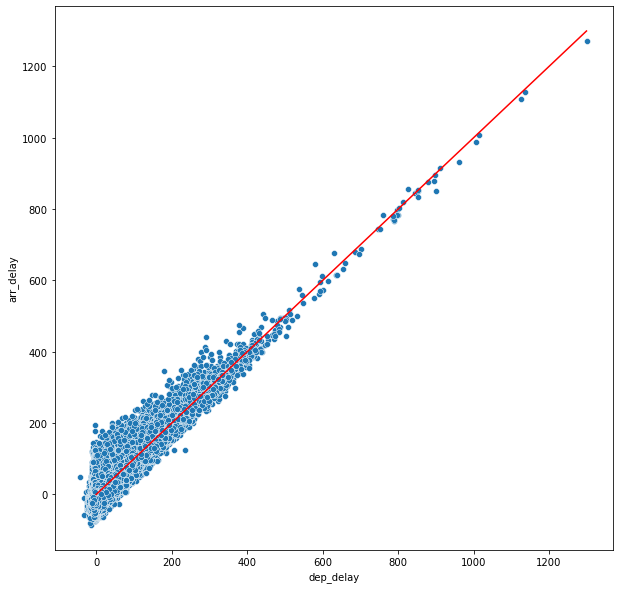

In [104]:
# 5. rozkład opóźnienia odlotu względem opóźnienia przylotu

plt.figure(figsize=(10, 10))

sns.scatterplot(x="dep_delay", y="arr_delay", data=nycflights13)
plt.plot(range(1300), range(1300), color='red')

plt.show()

In [ ]:
# 6. porównanie rozkładu opóźnienia odlotu i przylotu w każdym dniu tygodnia

In [ ]:
# 7. związek opóźnienia startu samolotu a prędkością wiatru

**Dla chętnych**: Rozszerzone dane na temat lotów można znaleźć tu: https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236. 

## Zadanie -  Największe miasta w Polsce pod względem liczby ludności
stan na 1 stycznia 2019: https://pl.wikipedia.org/wiki/Miasta_w_Polsce

Przedstaw na wykresie informacje na temat liczby ludności w 10 największych miastach w Polsce.

In [ ]:
# miasta_w_polsce = pd.DataFrame({
#     'lp': np.arange(1, 11, 1),
#     'miasto': ['Warszawa', 'Kraków', 'Łodź', 'Wrocław', 'Poznań', 'Gdańsk', 'Szczecin', 'Bydgoszcz', 
#               'Lublin', 'Białystok'],
#     'ludnosc': [1783321, 774839, 682679, 641607, 535802, 468158, 402067, 349021, 339770, 297356]
# })
# miasta_w_polsce

In [ ]:
#?plt.bar

In [ ]:
#?plt.barh

## Zadanie - Absolwenci  
Wczytaj dane `absolwenci_kierunek_20182019.csv` opisujące liczbe absolwentów wybranych kierunków w roku akademickim 2018/2019.

Przedstaw na wykresie:

a) proporcje absolwentów względem kierunku;

b) proporcje absolwentów względem kierunku i płci.

*Źródło danych*: https://stat.gov.pl/obszary-tematyczne/edukacja/edukacja/szkolnictwo-wyzsze-w-roku-akademickim-20182019-wyniki-wstepne,8,6.html

In [ ]:
# absolwenci = pd.read_csv('../data/absolwenci_kierunek_20182019.csv')
# absolwenci

In [ ]:
#?plt.pie

b) proporcje absolwentów względem kierunku i płci.

## Zadanie - ceny mieszkań 
Wczytaj dane `ceny_mieszkan_polska.csv` opisujące średnie kwartalne ceny mieszkań za metr kwadratowy w największych miastach w Polsce. 

a) Przedstaw na wykresie zależność ceny od czasu dla cen mieszkań za metr kwadratowy w trzech wybranych miastach w Polsce.

b) Przedstaw na wykresie rozkład ceny w zależności od miasta.

In [ ]:
# ceny_mieszkan = pd.read_csv('../data/ceny_mieszkan_polska.csv') # rynek pierwotny
# ceny_mieszkan.head(5)

## Zadanie - COVID-19
Wczytaj dane `covid19.csv` zawierające dane na temat liczby dziennych zakażeń oraz liczby zgonów spowodowanych koronawirusem.

a) Przedstaw na wykresie zależność liczby nowych zakażeń koronawirusem od czasu dla kilku wybranych krajów.

b) Przedstaw ranking krajów z największa liczbą stwierdzonych przypadków zakażeń koronawirusem oraz liczbą zgonów spowodowanych koronawirusem.

*Źródło*: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv

In [ ]:
# covid19 = pd.read_csv('../data/covid19.csv')
# covid19.head()

## Case study

Wczytaj dane `salaryData.csv` przedstawiające wysokość zarobków w największych firmach IT. Dokonaj analizy poniższego zbioru danych, m.in.

- sprawdź ogólny rozkład zarobków,
- sprawdź, w której firmie zarabia się najwięcej,
- sprawdź, na jakim stanowisku zarabia się najwięcej,
- sprawdź, w której lokalizacji zarabia się najwięcej,
- porównaj rozkład zarobków dla dwóch/trzech wybranych firm,
- porównaj rozkład dla dwóch/trzech stanowisk (np. Data Scientist vs. Software Engineer),
- porównaj rozkład dla kilku lokalizacji,
- porównaj rozkład dla dwóch/trzech stanowisk dla wybranej lokalizacji.

In [ ]:
# # https://www.levels.fyi/
# # data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
# # df = pd.DataFrame(data)

# df = pd.read_csv('../data/salaryData.csv')
# df.head(5)

In [ ]:
# df.info()

In [ ]:
# df.shape

## Dobry czy zły wykres?

- https://ceny.szybko.pl/Warszawa-ceny-mieszkan.html

## Inne ciekawe biblioteki
- https://plot.ly/python/
- https://docs.bokeh.org/en/latest/index.html
- http://www.pygal.org/en/latest/index.html
- http://ggplot.yhathq.com/

In [105]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", size='petal_length', hover_data='petal_width')
fig.show()